In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


In [2]:
df = pd.read_csv("data/net-zero-targets.csv")
df

,Entity,Code,Year,National Net-Zero Target
0,Afghanistan,AFG,2021,Target under discussion (2050)
1,Andorra,AND,2021,In policy document (2050)
2,Angola,AGO,2021,Target under discussion (2050)
3,Antigua and Barbuda,ATG,2021,Target under discussion (2050)
4,Argentina,ARG,2021,In policy document (2050)
...,...,...,...,...
129,Uruguay,URY,2021,In policy document (2050)
130,Vanuatu,VUT,2021,Target under discussion (2050)
131,Vatican City,NaN,2021,In policy document (2050)
132,Yemen,YEM,2021,Target under discussion (2050)


In [3]:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf = gdf[["name","iso_a3","geometry"]]

gdf.columns = ["country","country_code","geometry"]

gdf

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...
172,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Kosovo,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Trinidad and Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [4]:
#Drop Antarctica
print(gdf[gdf['country'] == 'Antarctica'])
gdf = gdf.drop(gdf.index[159])

        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


In [5]:
gdf = gdf.merge(df, left_on = "country_code", right_on = "Code", how = "left")
gdf = gdf[["country","country_code","geometry","National Net-Zero Target"]]

#For NaN values, fill No data
gdf.fillna("No data", inplace = True)

In [6]:
gdf

,country,country_code,geometry,National Net-Zero Target
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Proposed legislation (2050)
1,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Target under discussion (2050)
2,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",No data
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",In law (2050)
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",In policy document (2050)
...,...,...,...,...
171,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",No data
172,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",No data
173,Kosovo,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",No data
174,Trinidad and Tobago,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Target under discussion (2050)


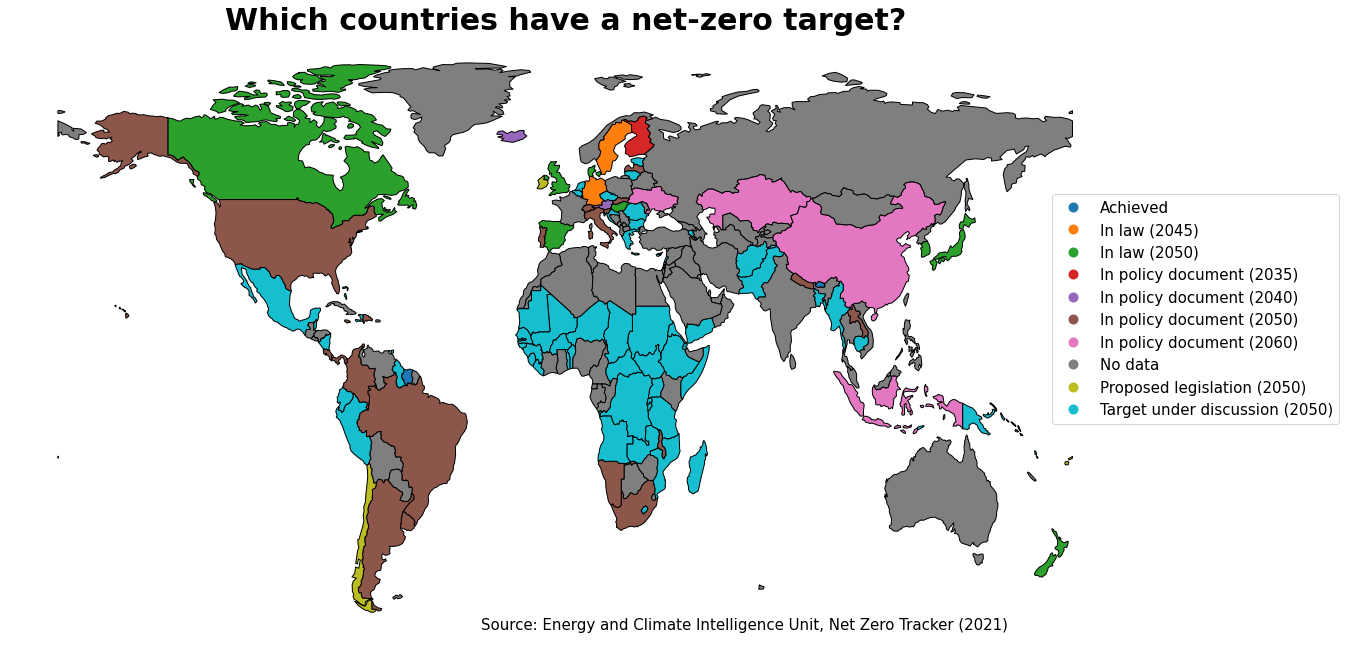

In [7]:
plt.rcParams["font.size"] = 15

gdf.plot(column = "National Net-Zero Target",
         edgecolor = "black",
         figsize = (20, 20),
         legend = True,
         legend_kwds ={"bbox_to_anchor":(1.2,0.75)},
        aspect = 1.4)

#Remove axis
plt.axis("off")

plt.title("Which countries have a net-zero target?", fontdict = {"weight":"bold", "size":30})

plt.text(-30, -60, "Source: Energy and Climate Intelligence Unit, Net Zero Tracker (2021)",
         fontdict = {"size":15})

plt.savefig("plots/Net zero target.jpeg",
            dpi = 300,
           bbox_inches = "tight")

plt.show()